In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:

X = mnist['data']
X.shape
y = mnist['target'].ravel()
X_w_bias = np.c_[np.ones([len(X), 1]), X]
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
#Normalize X
X_w_bias = X_w_bias /255.0 #To the X go from 0 to 1, instead of 0 to 255
X_train, X_test, y_train, y_test = train_test_split(X_w_bias, y, test_size = 0.4, random_state = 2)


In [7]:
#Let's take a validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2)
n_inputs = X_train.shape[1] #Number of features (all the pixels plus the bias term) 
n_outputs = len(np.unique(y_train)) #Number of possible classes (0 to 9 )
y_train

array(['7', '4', '7', ..., '1', '7', '8'], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
#One Hot the classes with a OneHotEncoder in order to have de probabilities of being any of this chances 
#on the labels 
#It is important to keep our encoded data as arrays
y_train_encoded = encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_val_encoded = encoder.fit_transform(y_val.reshape(-1,1)).toarray()
y_test_encoded = encoder.fit_transform(y_test.reshape(-1,1)).toarray()


In [9]:
y_train_encoded.shape

(33600, 10)

In [10]:
def Softmax(logits):
  exps = np.exp(logits)
  exp_sums = np.sum(exps, axis=1, keepdims=True)
  return exps / exp_sums



In [ ]:

#Lets do the Batch Gradient descent without the softmaxt algorithm
eta = 0.1 #Learning rate
n_iterations = 2501
m = len(X_train)
epsilon = 1e-7
thetas = np.random.rand(n_inputs, n_outputs) #Thetas for all the features and all the possible classes (all pixels plus bias X 0 to 9 classes)

for iteration in range(n_iterations):
  logits = X_train.dot(thetas)
  y_proba = Softmax(logits)
  loss = -np.mean(np.sum(y_train_encoded * np.log(y_proba + epsilon), axis=1)) #Cross entropy cost function
  if iteration % 500 == 0:
    print(iteration, loss)
  erro = y_proba - y_train_encoded
  gradients = 1/m * X_train.T.dot(erro)
  thetas = thetas - eta * gradients

  

In [ ]:
thetas


In [ ]:
#Let's do predictions for the validation set and check the accuracy score
logits = X_val.dot(thetas)
y_proba = Softmax(logits)
prediction = np.argmax(y_proba, axis=1) #Returns the INDEX with the highest probability
y_val_int = [int(string_val) for string_val in y_val ]
score_accuracy = np.mean(prediction == y_val_int)
prediction


let's add a bit of $\ell_2$ regularization 

In [ ]:
#Lets do the Batch Gradient descent without the softmaxt algorithm
eta = 0.1 #Learning rate
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 #Regularization Hyperparameter



thetas = np.random.rand(n_inputs, n_outputs) #Thetas for all the features and all the possible classes (all pixels plus bias X 0 to 9 classes)

for iteration in range(n_iterations):
  logits = X_train.dot(thetas)
  y_proba = Softmax(logits)
  X_entropy_loss = -np.mean(np.sum(y_train_encoded * np.log(y_proba + epsilon), axis=1)) #Cross entropy cost function
  l2_loss = 1/2 * np.sum(np.square(thetas[1:]))
  loss = X_entropy_loss + alpha * l2_loss
  if iteration % 500 == 0:
    print(iteration, loss)
  erro = y_proba - y_train_encoded
  gradients = 1/m * X_train.T.dot(erro) + np.r_[np.zeros([1,n_outputs]), alpha * thetas[1:]]
  thetas = thetas - eta * gradients


In [ ]:
logits = X_val.dot(thetas)
y_proba = Softmax(logits)
prediction = np.argmax(y_proba, axis=1) #Returns the INDEX with the highest probability
y_val_int = [int(string_val) for string_val in y_val ]
score_accuracy = np.mean(prediction == y_val_int)
score_accuracy

Finally, Let's add early stopping using the validation set on each epoch


0 18.316730432153932
500 5.277881058596735
1000 2.2704664656596947
1500 1.1799689250411076
2000 0.7823943520085597
2500 0.6371379667324781
3000 0.58400460321565
3500 0.5645538565061063
early stopping on epoch 3894!...
Best thetas:
[[1.85849683e-01 5.84170109e-02 7.91193270e-01 ... 7.28659781e-01
  8.75328867e-01 6.36181161e-01]
 [1.91994755e-02 1.86263890e-02 8.23037268e-03 ... 9.35500190e-03
  6.68877571e-03 9.20316177e-03]
 [4.95468984e-04 1.04980909e-02 1.81340786e-02 ... 9.52841700e-03
  1.82052847e-02 6.08999547e-03]
 ...
 [7.66949109e-03 2.78278815e-03 1.95809204e-02 ... 1.59578269e-02
  1.98701507e-02 7.64718063e-03]
 [1.30774328e-02 1.75878684e-03 1.06545835e-02 ... 1.66275220e-02
  1.30958068e-02 1.24950545e-02]
 [1.38125349e-03 2.91802287e-03 1.61895133e-02 ... 7.34525420e-03
  2.67769284e-03 4.35246102e-03]]


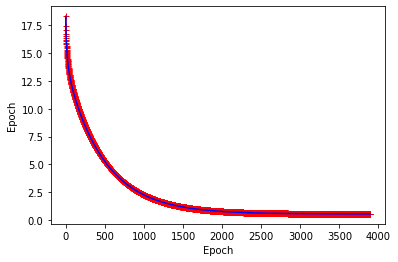

In [24]:
#Lets do the Batch Gradient descent without the softmaxt algorithm
eta = 0.1 #Learning rate
n_iterations = 10001
m = len(X_train)
epsilon = 1e-7
alpha = 0.01 #Regularization Hyperparameter

minimum_val_loss = np.infty

Training_loss, Validation_loss = [],[]

best_thetas = None
best_epoch = None

thetas = np.random.rand(n_inputs, n_outputs) #Thetas for all the features and all the possible classes (all pixels plus bias X 0 to 9 classes)

for iteration in range(n_iterations):
  #Process for training Set
  logits = X_train.dot(thetas)
  y_proba = Softmax(logits)
  X_entropy_loss = -np.mean(np.sum(y_train_encoded * np.log(y_proba + epsilon), axis=1)) #Cross entropy cost function
  l2_loss = 1/2 * np.sum(np.square(thetas[1:]))
  loss = X_entropy_loss + alpha * l2_loss
  Training_loss.append(loss)


  if iteration % 500 == 0:
    print(iteration, loss)
  erro = y_proba - y_train_encoded
  gradients = 1/m * X_train.T.dot(erro) + np.r_[np.zeros([1,n_outputs]), alpha * thetas[1:]]
  thetas = thetas - eta * gradients

#Process for validation set
  logits_val = X_val.dot(thetas)
  y_proba_val = Softmax(logits_val)
  Val_entropy_loss = -np.mean(np.sum(y_val_encoded * np.log(y_proba_val + epsilon), axis=1)) #Cross entropy cost function
  l2_loss = 1/2 * np.sum(np.square(thetas[1:]))
  loss = X_entropy_loss + alpha * l2_loss
  Validation_loss.append(loss)

 

  if Val_entropy_loss < minimum_val_loss:
    minimum_val_loss = Val_entropy_loss
    best_thetas = thetas
    best_epoch = iteration

  else:
    print(f"early stopping on epoch {iteration}!...")
    print(f"Best thetas:")
    print(thetas)
    plt.plot(Training_loss, "r-+", label="train")
    plt.plot(Validation_loss, "b-", label="val")
    plt.xlabel("Epoch")
    plt.ylabel("Epoch")
    break



Best thetas:
[[1.85849683e-01 5.84170109e-02 7.91193270e-01 ... 7.28659781e-01
  8.75328867e-01 6.36181161e-01]
 [1.91994755e-02 1.86263890e-02 8.23037268e-03 ... 9.35500190e-03
  6.68877571e-03 9.20316177e-03]
 [4.95468984e-04 1.04980909e-02 1.81340786e-02 ... 9.52841700e-03
  1.82052847e-02 6.08999547e-03]
 ...
 [7.66949109e-03 2.78278815e-03 1.95809204e-02 ... 1.59578269e-02
  1.98701507e-02 7.64718063e-03]
 [1.30774328e-02 1.75878684e-03 1.06545835e-02 ... 1.66275220e-02
  1.30958068e-02 1.24950545e-02]
 [1.38125349e-03 2.91802287e-03 1.61895133e-02 ... 7.34525420e-03
  2.67769284e-03 4.35246102e-03]]


(0.0, 10001.0, 0.0, 1.5)

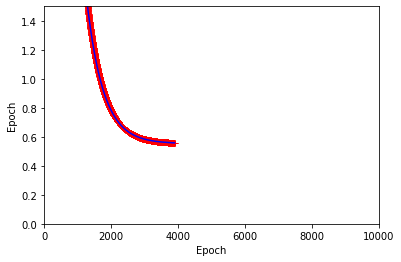

In [25]:
print(f"Best thetas:")
print(thetas)
plt.plot(Training_loss, "r-+", label="train")
plt.plot(Validation_loss, "b-", label="val")
plt.xlabel("Epoch")
plt.ylabel("Epoch")
plt.axis([0, n_iterations, 0, 1.5])

In [26]:
logits = X_val.dot(thetas)
y_proba = Softmax(logits)
prediction = np.argmax(y_proba, axis=1) #Returns the INDEX with the highest probability
y_val_int = [int(string_val) for string_val in y_val ]
score_accuracy = np.mean(prediction == y_val_int)
score_accuracy

0.8953571428571429